In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import scipy
%matplotlib inline

# 3.3

In [2]:
rng = np.random.RandomState(123)

d = 2
N = 10
mean = 5

x1 = rng.randn(N, d) + np.array([0,0])
x2 = rng.randn(N, d) + np.array([mean, mean])

In [3]:
x = np.concatenate((x1, x2), axis = 0)
x1x = np.array([a[0] for a in x1])
x1y = np.array([a[1] for a in x1])
x2x = np.array([a[0] for a in x2])
x2y = np.array([a[1] for a in x2])


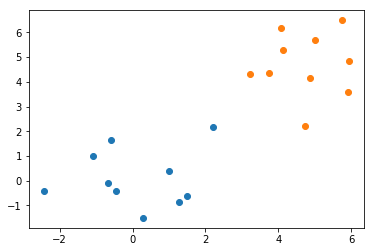

In [4]:
plt.plot(x1x,x1y,'o')
plt.plot(x2x, x2y, 'o')

In [5]:
w = np.zeros(d)
b = 0

In [6]:
def y(x):
    return step(np.dot(w,x) + b)

def step(x):
    return 1 * (x>0)

In [7]:
def t(i):
    if i < N:
        return 0
    else:
        return 1

In [8]:
while True:
    classified = True
    for i in range(N * 2):
        delta_w = (t(i) - y(x[i])) * x[i]
        delta_b = (t(i) - y(x[i]))
        w += delta_w
        b += delta_b
        classified *= all(delta_w == 0) * (delta_b == 0)
    if classified:
        break

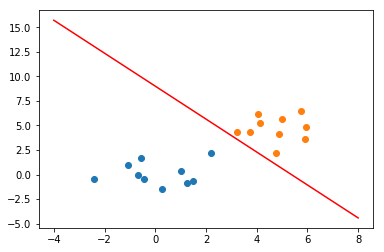

In [9]:
xx = np.linspace(-4,8,100)
yy = np.array([-w[0]/w[1]*a - b for a in xx])
plt.plot(x1x,x1y,'o')
plt.plot(x2x, x2y, 'o')
plt.plot(xx,yy,'r-')

# 3.4

In [10]:
w = tf.Variable(tf.zeros([2,1]))
b = tf.Variable(tf.zeros([1]))
print(w)

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32_ref>


In [11]:
def y(x):
    return sigmoid(np.dot(w,x) + b)

def sigmoid(x):
    return 1/(1+np.exp(-x))

In [12]:
x = tf.placeholder(tf.float32, shape=[None, 2])
t = tf.placeholder(tf.float32, shape=[None, 1])
y = tf.nn.sigmoid(tf.matmul(x, w) + b)

In [13]:
cross_entropy = -tf.reduce_sum(t * tf.log(y) + (1-t) * tf.log(1-y))
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy)
correct_prediction = tf.equal(tf.to_float(tf.greater(y, 0.5)),t)

In [14]:
X = np.array([[0,0], [0,1], [1,0], [1,1]])
Y = np.array([[0], [1], [1], [1]])

In [15]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [16]:
for epoch in range(200):
    sess.run(train_step, feed_dict={x:X,t:Y})

In [17]:
classified = correct_prediction.eval(session=sess, feed_dict={
    x:X,
    t:Y
})
print(classified)

[[ True]
 [ True]
 [ True]
 [ True]]


In [18]:
prob = y.eval(session=sess, feed_dict={x:X,t:Y})
print(prob)

[[ 0.22355038]
 [ 0.91425949]
 [ 0.91425949]
 [ 0.99747425]]


In [19]:
print('w:', sess.run(w))
print('b:', sess.run(b))

w: [[ 3.61188436]
 [ 3.61188436]]
b: [-1.24509501]


# 3.5

In [20]:
from sklearn.utils import shuffle

## preset

In [21]:
M = 2
K = 3
n = 100
N = n * K

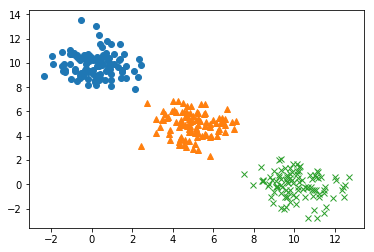

In [22]:
X1 = np.random.randn(n, M) + np.array([0, 10])
X2 = np.random.randn(n, M) + np.array([5, 5])
X3 = np.random.randn(n, M) + np.array([10, 0])
Y1 = np.array([[1, 0, 0] for i  in range(n)])
Y2 = np.array([[0, 1, 0] for i  in range(n)])
Y3 = np.array([[0, 0, 1] for i  in range(n)])

X1x = np.array([a[0] for a in X1])
X1y = np.array([a[1] for a in X1])
X2x = np.array([a[0] for a in X2])
X2y = np.array([a[1] for a in X2])
X3x = np.array([a[0] for a in X3])
X3y = np.array([a[1] for a in X3])

X = np.concatenate((X1, X2, X3), axis = 0)
Y = np.concatenate((Y1, Y2, Y3), axis = 0)

plt.plot(X1x, X1y, 'o')
plt.plot(X2x, X2y, '^')
plt.plot(X3x, X3y, 'x')

## modeling

In [23]:
W = tf.Variable(tf.zeros([M, K]))
b = tf.Variable(tf.zeros([K]))

x = tf.placeholder(tf.float32, shape=[None, M])
t = tf.placeholder(tf.float32, shape=[None, K])
y = tf.nn.sigmoid(tf.matmul(x, W) + b)

In [24]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(t * tf.log(y), reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(t,1))

In [25]:
init_op = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init_op)

## learning

In [26]:
batch_size = 50
n_batches = N // batch_size

In [27]:
for epoch in range(20):
    X_, Y_ = shuffle(X, Y)
    
    for i in range(n_batches):
        start = i * batch_size
        end = start + batch_size
        XX_ = X_[start:end]
        YY_ = Y_[start:end]
        
        sess.run(train_step, feed_dict={x: XX_, t: YY_})

In [28]:
X_, Y_ = shuffle(X, Y)

classified = correct_prediction.eval(session=sess,feed_dict={
    x: X_[0:10],
    t: Y_[0:10]
})

prob = y.eval(session=sess, feed_dict={
    x:X_[0:10]
})

print('classified:')
print(classified)
print()
print('output probability:')
print(prob)

classified:
[ True  True  True  True  True  True  True  True  True  True]

output probability:
[[ 0.99627614  0.99550736  0.65083408]
 [ 0.67438281  0.99866533  0.99882179]
 [ 0.97163075  0.99690419  0.95486432]
 [ 0.86620653  0.98695135  0.95463347]
 [ 0.99542612  0.99295956  0.5781638 ]
 [ 0.99845505  0.99483716  0.40221781]
 [ 0.96044815  0.99769956  0.97641653]
 [ 0.95472509  0.99589181  0.96104598]
 [ 0.58342004  0.99575788  0.99703622]
 [ 0.99676728  0.99551278  0.6190331 ]]


In [29]:
ww = sess.run(W)
bb = sess.run(b)
print(ww,bb)




[[  5.85202593e-03   5.36699355e-01   5.99104345e-01]
 [  6.08671486e-01   5.27494013e-01  -1.11747693e-04]] [ 0.0633411   0.11235175  0.06079739]


(-4, 14)

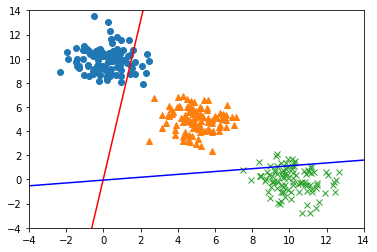

In [30]:
xx = np.linspace(-4,14,100)
yy1 = np.array([-(ww[0][0]-ww[0][1])/(ww[1][0]-ww[1][1])*a + bb[1] - bb[0] for a in xx])
yy2 = np.array([-(ww[0][1]-ww[0][2])/(ww[1][1]-ww[1][2])*a + bb[2] - bb[1] for a in xx])

plt.plot(X1x, X1y, 'o')
plt.plot(X2x, X2y, '^')
plt.plot(X3x, X3y, 'x')
plt.plot(xx, yy1, 'r-')
plt.plot(xx, yy2, 'b-')

plt.xlim(-4,14)
plt.ylim(-4,14)

# 3.6

In [31]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

Using TensorFlow backend.


In [33]:
np.random.seed(0)

X = np.array([[0,0],[0,1],[1,0],[1,1]])
Y = np.array([[0],[1],[1],[0]])

model = Sequential([
    Dense(input_dim=2, output_dim=1),
    Activation('sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer=SGD(lr=0.1))
model.fit(X,Y, epochs=200, batch_size=1)

prob = model.predict_proba(X, batch_size=1)
print(prob)

/Users/hiroki/.pyenv/versions/anaconda3-4.0.0/envs/py3_personal/lib/python3.5/site-packages/ipykernel/__main__.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=2, units=1)`


Epoch 1/200
4/4 [==============================] - 0s - loss: 0.8427     
Epoch 2/200
4/4 [==============================] - 0s - loss: 0.8205     
Epoch 3/200
4/4 [==============================] - 0s - loss: 0.8049     
Epoch 4/200
4/4 [==============================] - 0s - loss: 0.7924     
Epoch 5/200
4/4 [==============================] - 0s - loss: 0.7822     
Epoch 6/200
4/4 [==============================] - 0s - loss: 0.7754     
Epoch 7/200
4/4 [==============================] - 0s - loss: 0.7688     
Epoch 8/200
4/4 [==============================] - 0s - loss: 0.7622     
Epoch 9/200
4/4 [==============================] - 0s - loss: 0.7578     
Epoch 10/200
4/4 [==============================] - 0s - loss: 0.7555     
Epoch 11/200
4/4 [==============================] - 0s - loss: 0.7520     
Epoch 12/200
4/4 [==============================] - 0s - loss: 0.7497     
Epoch 13/200
4/4 [==============================] - 0s - loss: 0.7468     
Epoch 14/200
4/4 [================

4/4 [==============================] - 0s - loss: 0.7197     
Epoch 110/200
4/4 [==============================] - 0s - loss: 0.7194     
Epoch 111/200
4/4 [==============================] - 0s - loss: 0.7191     
Epoch 112/200
4/4 [==============================] - 0s - loss: 0.7198     
Epoch 113/200
4/4 [==============================] - 0s - loss: 0.7196     
Epoch 114/200
4/4 [==============================] - 0s - loss: 0.7190     
Epoch 115/200
4/4 [==============================] - 0s - loss: 0.7190     
Epoch 116/200
4/4 [==============================] - 0s - loss: 0.7197     
Epoch 117/200
4/4 [==============================] - 0s - loss: 0.7190     
Epoch 118/200
4/4 [==============================] - 0s - loss: 0.7196     
Epoch 119/200
4/4 [==============================] - 0s - loss: 0.7194     
Epoch 120/200
4/4 [==============================] - 0s - loss: 0.7189     
Epoch 121/200
4/4 [==============================] - 0s - loss: 0.7196     
Epoch 122/200
4/4 [=======

# 3.6.3
## TensorFlow

In [46]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
Y = np.array([[0],[1],[1],[0]])

In [47]:
x = tf.placeholder(tf.float32, shape=[None, 2])
t = tf.placeholder(tf.float32, shape=[None, 1])

In [48]:
W = tf.Variable(tf.truncated_normal([2,2]))
b = tf.Variable(tf.zeros([2]))
h = tf.nn.sigmoid(tf.matmul(x, W) + b)

In [49]:
V = tf.Variable(tf.truncated_normal([2, 1]))
c = tf.Variable(tf.zeros([1]))
y = tf.nn.sigmoid(tf.matmul(h,V) + c)

In [50]:
cross_entropy = - tf.reduce_sum(t * tf.log(y) + (1-t) * tf.log(1-y))
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy)
correct_prediction = tf.equal(tf.to_float(tf.greater(y, 0.5)), t)

In [54]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

for epoch in range(10000):
    sess.run(train_step, feed_dict={x: X, t: Y})
    if epoch % 1000 == 0:
        print('epoch:',epoch)

epoch: 0
epoch: 1000
epoch: 2000
epoch: 3000
epoch: 4000
epoch: 5000
epoch: 6000
epoch: 7000
epoch: 8000
epoch: 9000


In [55]:
classified = correct_prediction.eval(session=sess, feed_dict={x:X, t:Y})
prob = y.eval(session=sess, feed_dict={x:X})

print('classified:')
print(classified)
print()
print('output probability:')
print(prob)

classified:
[[ True]
 [ True]
 [ True]
 [ True]]

output probability:
[[ 0.002513  ]
 [ 0.99657035]
 [ 0.99767417]
 [ 0.00216234]]


# 3.7

In [62]:
from sklearn import datasets

N = 300
X, y =datasets.make_moons(N, noise=0.3)
y

array([0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0])

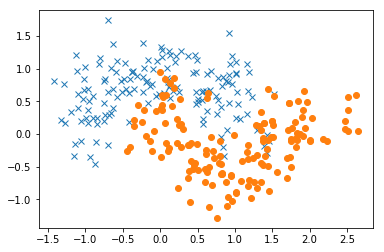

In [66]:
X0x = np.array([a[0] for a,b in zip(X,y) if b==0])
X0y = np.array([a[1] for a,b in zip(X,y) if b==0])
X1x = np.array([a[0] for a,b in zip(X,y) if b==1])
X1y = np.array([a[1] for a,b in zip(X,y) if b==1])
plt.plot(X0x, X0y, 'x')
plt.plot(X1x, X1y, 'o')

In [68]:
from sklearn.model_selection import train_test_split

Y = y.reshape(N, 1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8)

In [79]:
num_hidden = 3

In [80]:
x = tf.placeholder(tf.float32, shape=[None, 2])
t = tf.placeholder(tf.float32, shape=[None, 1])

In [81]:
W = tf.Variable(tf.truncated_normal([2, num_hidden]))
b = tf.Variable(tf.zeros([num_hidden]))
h = tf.nn.sigmoid(tf.matmul(x, W) + b)

In [82]:
V = tf.Variable(tf.truncated_normal([num_hidden, 1]))
c = tf.Variable(tf.zeros([1]))
y = tf.nn.sigmoid(tf.matmul(h, V) + c)

In [83]:
cross_entropy = -tf.reduce_sum(t * tf.log(y) + (1 - t)*tf.log(1-y))
train_step = tf.train.GradientDescentOptimizer(0.05).minimize(cross_entropy)
correct_prediction = tf.equal(tf.to_float(tf.greater(y, 0.5)), t)

In [84]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [85]:
batch_size = 20
n_batches = N // batch_size

In [86]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [87]:
for epoch in range(500):
    X_, Y_ = shuffle(X_train, Y_train)
    
    for i in range(n_batches):
        start = i * batch_size
        end = start + batch_size
        
        sess.run(train_step, feed_dict={x: X_[start:end], t:Y_[start:end]})

In [88]:
accuracy_rate = accuracy.eval(session=sess, feed_dict={x: X_test, t:Y_test})
print('accuracy:', accuracy_rate)

accuracy: 0.916667
